In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
heart_df = pd.read_csv("heart.csv")

In [4]:
print(f'The dataset has {heart_df.shape[0]} rows and {heart_df.shape[1]} columns')

The dataset has 303 rows and 14 columns


In [5]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Brief Description of the columns
Sex:

Cp: Chest Pain Level

trtbps: Resting Blood Pressure in mm/Hg

chol: Cholesterol in mg/dl

fbs: fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting ECG results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh: maximum heart rate achieved

exng: exercise induced angina

oldpeak: ST depression

slp slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thall 3 = normal; 6 = fixed defect; 7 = reversable defect

output: Heart attack or not

In [6]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

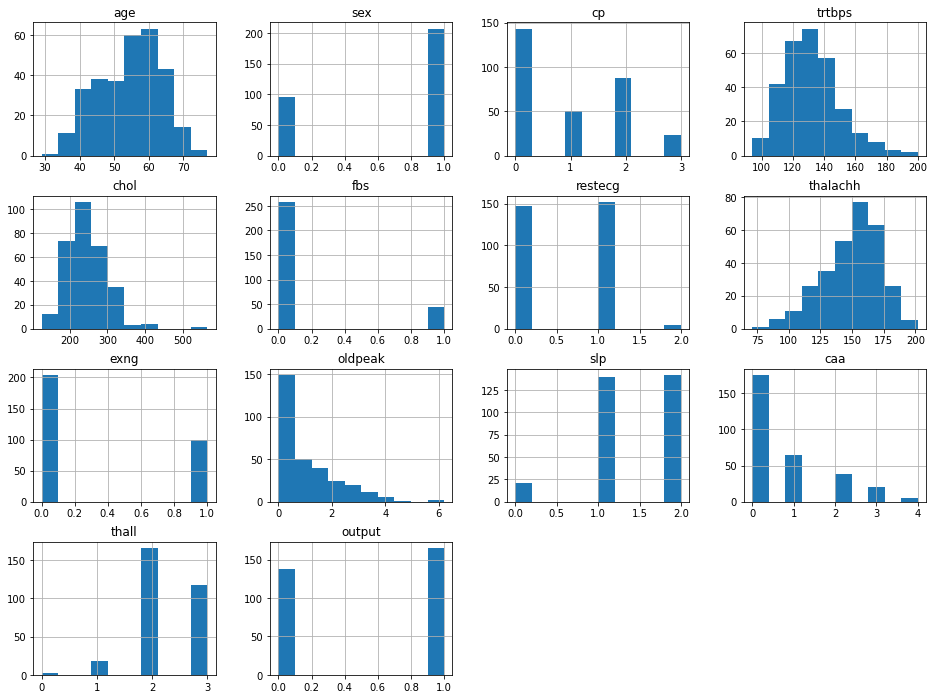

In [7]:
heart_df.hist(figsize = (16,12))

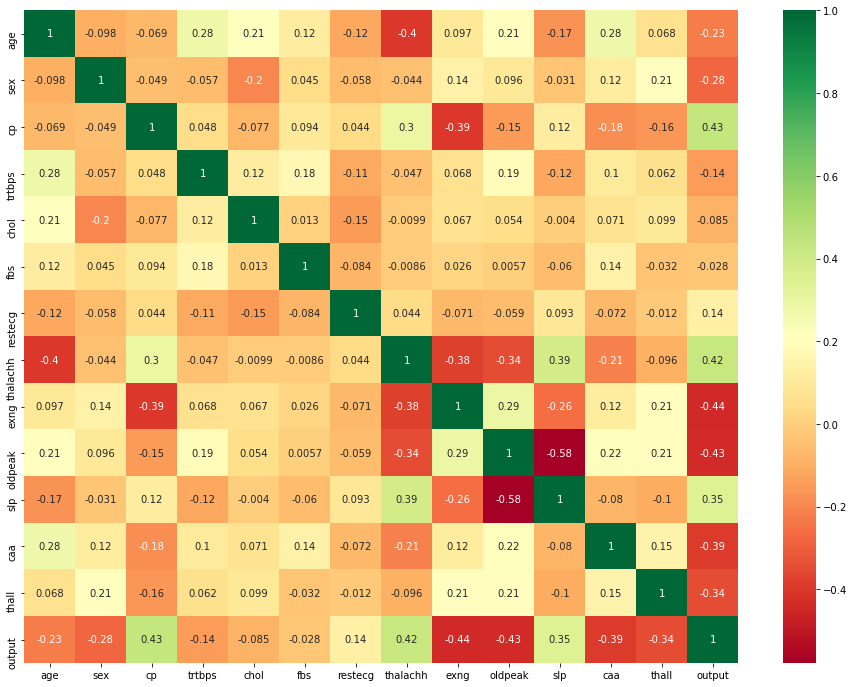

In [8]:
# Correlation matrix and heatmap
cor_mat = heart_df.corr()
topCorrFeatures = cor_mat.index
plt.figure(figsize = (16,12))
dataplot = sns.heatmap(heart_df[topCorrFeatures].corr(), cmap="RdYlGn", annot=True)
plt.show()

In [9]:
continuousFeatures = ["age", "thalachh", "chol", "trtbps"]
categoricalFeatures = ["sex", "cp", "fbs","caa", "restecg", "exng", "oldpeak", "slp", "thall"]

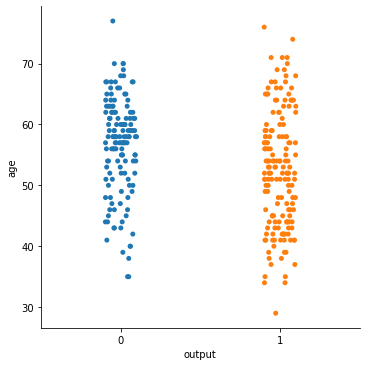

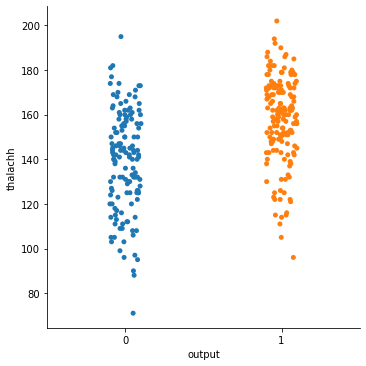

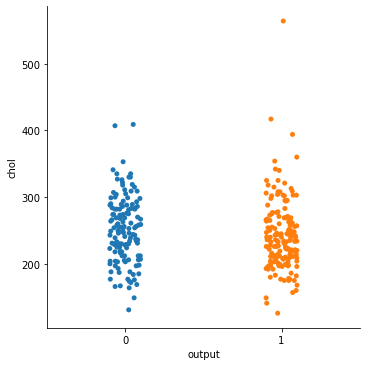

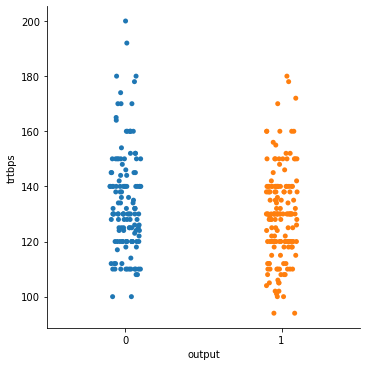

In [10]:
#Plotting the continuous features
for i in range(len(continuousFeatures)):
    sns.catplot(x="output", y=continuousFeatures[i], data=heart_df)
plt.show()

# Categorical features vs Output

### Sex and Output

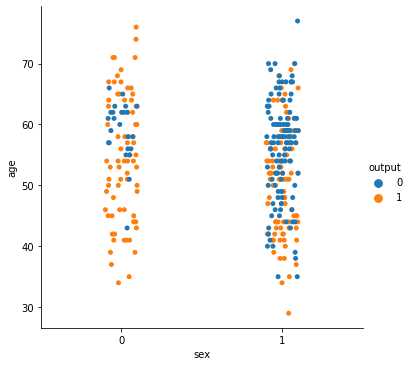

In [11]:
sns.catplot(x="sex", y="age",hue="output", data=heart_df)

From the graph it is seen that females might have a higher probability of heart attacks. It is seen by doing a research that heart disease was the leading cause of death of women in United States, killing 1 in 5 female

### Fasting blood sugar

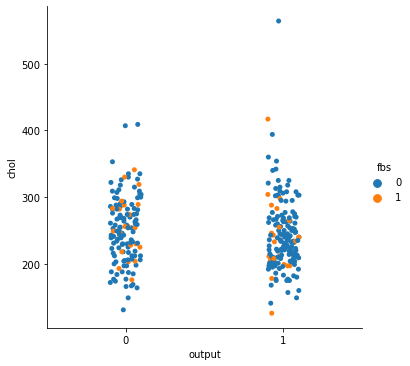

In [12]:
sns.catplot(x="output",y="chol", hue="fbs", data=heart_df)

In [13]:
fbs = (heart_df.fbs == 1).sum()
print(f"People with fasting blood sugar > 120mg/dl: {fbs}")
fbsHeartAttack = ((heart_df.fbs == 1) & (heart_df.output == 1)).sum()
noFbsHeartAttack = ((heart_df.fbs == 0) & (heart_df.output == 1)).sum()
print(f"Fasting blood sugar>120mg/dl who had heart attacks: {fbsHeartAttack}")

People with fasting blood sugar > 120mg/dl: 45
Fasting blood sugar>120mg/dl who had heart attacks: 23


The dataset has less people with fasting blood sugar greater than 120mg/dl. So the feature provides less insight

### Rest ECG Results

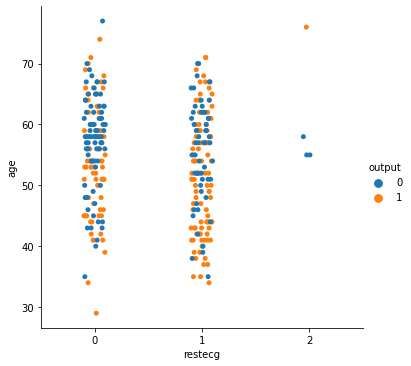

In [14]:
sns.catplot(x="restecg", y="age", hue="output", data =heart_df)

# Machine Learning

In [24]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = heart_df.iloc[:,[0,3,4,7,9,]]
ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_df = pd.concat([scaled_values,heart_df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)

In [25]:
x = scaled_df.iloc[:,:-1]
y=heart_df.iloc[:,-1].values


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
keys = ["Logistic Regression", "Decision Tree ", "Random Forest Classifier", "Naive Bayes Classifier", "K Nearest Neighbors Classifier", "Support Vector Machine Classifier"]
values = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]
models = dict(zip(keys,values))

In [29]:
print("Models and accuracy")
for model,algo in models.items():
    classifier = algo
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{model}: {score}")

Models and accuracy
Logistic Regression: 0.8524590163934426
Decision Tree : 0.7377049180327869
Random Forest Classifier: 0.8360655737704918
Naive Bayes Classifier: 0.8524590163934426
K Nearest Neighbors Classifier: 0.8360655737704918
Support Vector Machine Classifier: 0.8688524590163934


In [30]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{k}: {score}")

1: 0.7704918032786885
2: 0.7704918032786885
3: 0.8032786885245902
4: 0.7868852459016393
5: 0.8360655737704918
6: 0.8360655737704918
7: 0.8524590163934426
8: 0.8524590163934426
9: 0.8032786885245902
10: 0.8360655737704918
11: 0.8032786885245902
12: 0.8360655737704918
13: 0.8360655737704918
14: 0.8032786885245902
15: 0.8360655737704918
16: 0.8524590163934426
17: 0.8360655737704918
18: 0.819672131147541
19: 0.8032786885245902
20: 0.8032786885245902
21: 0.7868852459016393
22: 0.7704918032786885
23: 0.7868852459016393
24: 0.7704918032786885
25: 0.7704918032786885
26: 0.7704918032786885
27: 0.7868852459016393
28: 0.7868852459016393
29: 0.7868852459016393


In [31]:
for k in range(1,30):
    classifier = RandomForestClassifier(n_estimators = k, random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{k}: {score}")

1: 0.7868852459016393
2: 0.7540983606557377
3: 0.7540983606557377
4: 0.8032786885245902
5: 0.7868852459016393
6: 0.8032786885245902
7: 0.8032786885245902
8: 0.819672131147541
9: 0.8524590163934426
10: 0.8360655737704918
11: 0.8524590163934426
12: 0.8524590163934426
13: 0.8360655737704918
14: 0.819672131147541
15: 0.8360655737704918
16: 0.819672131147541
17: 0.8360655737704918
18: 0.819672131147541
19: 0.8360655737704918
20: 0.819672131147541
21: 0.819672131147541
22: 0.8360655737704918
23: 0.8360655737704918
24: 0.819672131147541
25: 0.819672131147541
26: 0.819672131147541
27: 0.819672131147541
28: 0.819672131147541
29: 0.8524590163934426


In [32]:
n_estimators = [x for x in range(1,30)]
max_depth = [x for x in range(1,20)]
min_samples_split = [x for x in range(2,6)]
max_leaf_nodes = [x for x in range(2,10)]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split" : min_samples_split,
    "max_leaf_nodes": max_leaf_nodes
}

In [33]:
classifier = RandomForestClassifier(random_state = 0)

In [34]:
#from sklearn.model_selection import GridSearchCV
#rf_grid = GridSearchCV(classifier, param_grid,cv=3,verbose=True, n_jobs = 1)
#rf_grid.fit(X_train,y_train)

In [35]:
#rf_grid.best_params_

<p>Best parameters from Grid Search<br>
'max_depth': 4<br>
'max_leaf_nodes': 9,<br>
'min_samples_split': 2,<br>
'n_estimators': 18</p>

In [36]:
classifier = RandomForestClassifier(n_estimators = 18, max_leaf_nodes = 9, min_samples_split = 2, max_depth=4, random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f"Accuracy : {score*100}%")

Accuracy : 81.9672131147541%


In [56]:
xNew = scaled_df.iloc[:,:-1]

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,1,1,1,0,3
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,3,0,1,0,1,0,3
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,1,1,0,1,2,3
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,1,1,1,1,3


In [57]:
X_train,X_test,y_train,y_test = train_test_split(xNew,y,random_state=0,test_size=0.2)
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
74,-1.253580,-0.549641,-0.642843,0.671400,-0.724323,0,2,0,1,0,1,0,2
153,1.283063,0.821069,0.613313,0.102904,-0.896862,0,2,0,0,0,1,1,2
64,0.400752,0.478391,-0.681494,0.671400,-0.896862,1,2,1,0,0,2,0,2
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,0,0,0,1,1,1,0,2
287,0.290464,1.277972,-0.275659,0.627670,-0.896862,1,1,0,0,0,2,1,2


In [58]:
classifier = RandomForestClassifier(n_estimators = 18, max_leaf_nodes = 9, min_samples_split = 2, max_depth=4, random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f"Accuracy : {score*100}%")

Accuracy : 81.9672131147541%


In [59]:
X_train

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
74,-1.253580,-0.549641,-0.642843,0.671400,-0.724323,0,2,0,1,0,1,0,2
153,1.283063,0.821069,0.613313,0.102904,-0.896862,0,2,0,0,0,1,1,2
64,0.400752,0.478391,-0.681494,0.671400,-0.896862,1,2,1,0,0,2,0,2
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,0,0,0,1,1,1,0,2
287,0.290464,1.277972,-0.275659,0.627670,-0.896862,1,1,0,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.253580,0.021488,0.014223,-0.290671,-0.810592,1,0,1,0,1,1,4,3
192,-0.040403,-0.663867,-1.125980,-1.602586,0.310912,1,0,0,1,0,1,1,3
117,0.180175,-0.663867,-1.029353,0.540209,0.742260,1,3,0,0,0,1,0,3
47,-0.812425,0.364165,0.207478,0.277826,-0.896862,1,2,0,0,0,2,0,2
